# 6장 헬로 딥러닝 MNIST

## 6.1 MNIST 학습하기

1. 텐서플로 임포트, 텐서플로에 내장된 mnist.input\_data 모듈 임포트

In [1]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


2. MNIST 손글씨 이미지는 28 $\times$ 28 픽셀이다. 즉 784개의 특징으로 이루어져 있다. 레이블은 0에서 9까지인 10개의 분류로 나누어 진다.

In [2]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

- 데이터를 적당한 크기로 잘라서 학습시키는데, 이것을 **미니배치**라 한다.
- None은 한 번에 학습시킬 이미지의 개수, 즉 배치 크기를 정하는 자리이다. 한번에 학습할 개수를 계속 바꿔가면서 실험해보려면 None으로 넣어주면 텐서플로가 알아서 계산한다.

신경망 모습

```
784(입력, 특징 개수) - > 256(첫 번째 은닉층 뉴런 개수) -> 256(두 번째 은닉층 뉴런 개수) -> 10(결과값 0-9 분류 개수)
```

이를 코드로 구성하면 다음과 같다.

In [3]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01))
model = tf.matmul(L2, W3)

3. 다음으로 tf.nn.softmax_cross_entropy_with_logtis 함수를 이용하여 각 이미지에 대한 손실값(실제값과 예측값의 차이)을 구하고 tf.reduce_mean 함수를 이용해 미니배치의 평균 손실값을 구한다. 그리고 tf.train.AdamOptimizer 함수를 사용하여 이 손실값을 최소화하는 최적화를 수행하도록 그래프를 구성한다.

In [4]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

신경망 모델 초기화, 학습 진행할 세션 시작

In [5]:
init = tf.global_variables_initializer()

In [6]:
sess = tf.Session()
sess.run(init)

In [7]:
batch_size = 100

In [8]:
total_batch = int(mnist.train.num_examples / batch_size)

MNIST 데이터 전체를 학습하는 일을 총 15번 반복하자. 학습 데이터 전체를 한 바퀴 도는 것을 **에포크**(epoch)라 한다.

아래 반복문 학습한 데이터를 배치 크기만큼 가져온 뒤, 입력값 데이터는 batch\_xs, 출력값 데이터는 batch\_ys에 저장한다. 다음으로 sess.run을 이용하려 최적화시키고 손실값을 가져와서 저장한다.

In [9]:
for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size=batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs, Y: batch_ys})
        
        total_cost += cost_val
        
    print ('Epoch:', '%04d' % (epoch + 1),
           'AVG. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print ('최적화 완료!')

Epoch: 0001 AVG. cost= 0.411
Epoch: 0002 AVG. cost= 0.149
Epoch: 0003 AVG. cost= 0.096
Epoch: 0004 AVG. cost= 0.069
Epoch: 0005 AVG. cost= 0.052
Epoch: 0006 AVG. cost= 0.041
Epoch: 0007 AVG. cost= 0.030
Epoch: 0008 AVG. cost= 0.025
Epoch: 0009 AVG. cost= 0.021
Epoch: 0010 AVG. cost= 0.017
Epoch: 0011 AVG. cost= 0.016
Epoch: 0012 AVG. cost= 0.014
Epoch: 0013 AVG. cost= 0.014
Epoch: 0014 AVG. cost= 0.009
Epoch: 0015 AVG. cost= 0.012
최적화 완료!


6. 결과를 출력해 보자.

In [10]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))

7. tf.cast를 이용해 is\_correct를 0과 1로 변환한다. 그리고 변환한 값들을 tf.reduce\_mean을 이용해 평균을 내면 그것이 바로 정확도가 된다.

In [11]:
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

print ('정확도:', sess.run(accuracy,
                         feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels}))

정확도: 0.9788


## 전체 코드

In [12]:
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

################
# 신경망 모델 구성 #
################

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)

W3 = tf.Variable(tf.random_normal([256, 10]))
B3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), B3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

################
# 신경망 모델 학습 #
################

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print ('Epoch:', '%04d' % (epoch + 1),
           'AVG. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print ('최적화 완료!')

###########
# 결과 확인 #
##########

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print ('정확도:', sess.run(accuracy,
                         feed_dict = {X: mnist.test.images,
                                      Y: mnist.test.labels}))

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 AVG. cost= 0.216
Epoch: 0002 AVG. cost= 0.092
Epoch: 0003 AVG. cost= 0.064
Epoch: 0004 AVG. cost= 0.049
Epoch: 0005 AVG. cost= 0.040
Epoch: 0006 AVG. cost= 0.031
Epoch: 0007 AVG. cost= 0.032
Epoch: 0008 AVG. cost= 0.028
Epoch: 0009 AVG. cost= 0.022
Epoch: 0010 AVG. cost= 0.022
Epoch: 0011 AVG. cost= 0.021
Epoch: 0012 AVG. cost= 0.021
Epoch: 0013 AVG. cost= 0.012
Epoch: 0014 AVG. cost= 0.017
Epoch: 0015 AVG. cost= 0.016
Epoch: 0016 AVG. cost= 0.012
Epoch: 0017 AVG. cost= 0.018
Epoch: 0018 AVG. cost= 0.010
Epoch: 0019 AVG. cost= 0.018
Epoch: 0020 AVG. cost= 0.011
Epoch: 0021 AVG. cost= 0.008
Epoch: 0022 AVG. cost= 0.016
Epoch: 0023 AVG. cost= 0.010
Epoch: 0024 AVG. cost= 0.011
Epoch: 0025 AVG. cost= 0.008
Epoch: 0026 AVG. cost= 0.013
Epoch: 0027 AVG. cost= 0.011
Epoch: 0028 AVG

## 6.2 드롭아웃

- **드롭아웃**은 과적합 문제를 가장 잘 해결할 수 있는 방법 중 하나이다. 학습시 전체 신경망 중 일부만을 사용하도록 하는 것이다. 
- 즉, 학습 단계마다 일부 뉴런을 제거(사용하지 않도록) 함으로써, 일부 특징이 특정 뉴런들에 고정되는 것을 막아 가중치의 균형을 잡도록 하여 과적합을 방지한다. 
- 다만, 학습 시 일부 뉴런을 학습시키지 않기 때문에 신경망이 충분히 학습되기까지의 시간은 조금 더 오래 걸린다.

1. 드롭아웃은 텐서플로가 기본으로 지원해주기 때문에 아주 간단하게 적용할 수 있다.

In [13]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, 0.8)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L1, 0.8)

- 계층 구성의 마지막에 tf.nn.dropout 함수를 사용하기만 하면 된다. 0.8은 사용할 뉼너의 비율을 뜻한다.
- 학습이 끝난 후, 예측을 할 시에는 신경망 전체를 사용하도록 해야 한다. keep\_prob 플레이스홀더를 만들어서, 학습 시에는 0.8을 넣어 드롭아웃을 사용하도록 하고, 예측 시에는 1을 넣어 신경망 전체를 사용하도록 만들어야 한다.

In [14]:
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L1, keep_prob)

# 학습 코드: keep_prob를 0.8로 넣어준다.
_, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y:batch_ys, keep_prob:0.8})

# 예측 코드: keep_prob를 1로 넣어준다.
print ('정확도:', sess.run(accuracy,
                         feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels,
                                    keep_prob: 1}))

정확도: 0.977


## 전체 코드

In [15]:
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

################
# 신경망 모델 구성 #
################

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L1, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10]))
B3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), B3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))

optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

################
# 신경망 모델 학습 #
################

init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict = {X: batch_xs,
                                            Y: batch_ys,
                                            keep_prob: 0.8})
        total_cost += cost_val
        
    print ('Epoch:', '%04d' % (epoch + 1),
           'AVG. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print ('최적화 완료!')

###########
# 결과 확인 #
##########

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print ('정확도:', sess.run(accuracy,
                         feed_dict = {X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1})) 

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 AVG. cost= 0.312
Epoch: 0002 AVG. cost= 0.178
Epoch: 0003 AVG. cost= 0.146
Epoch: 0004 AVG. cost= 0.128
Epoch: 0005 AVG. cost= 0.113
Epoch: 0006 AVG. cost= 0.103
Epoch: 0007 AVG. cost= 0.093
Epoch: 0008 AVG. cost= 0.088
Epoch: 0009 AVG. cost= 0.081
Epoch: 0010 AVG. cost= 0.077
Epoch: 0011 AVG. cost= 0.073
Epoch: 0012 AVG. cost= 0.067
Epoch: 0013 AVG. cost= 0.068
Epoch: 0014 AVG. cost= 0.064
Epoch: 0015 AVG. cost= 0.057
Epoch: 0016 AVG. cost= 0.058
Epoch: 0017 AVG. cost= 0.057
Epoch: 0018 AVG. cost= 0.052
Epoch: 0019 AVG. cost= 0.053
Epoch: 0020 AVG. cost= 0.048
Epoch: 0021 AVG. cost= 0.049
Epoch: 0022 AVG. cost= 0.047
Epoch: 0023 AVG. cost= 0.042
Epoch: 0024 AVG. cost= 0.042
Epoch: 0025 AVG. cost= 0.046
Epoch: 0026 AVG. cost= 0.041
Epoch: 0027 AVG. cost= 0.040
Epoch: 0028 AVG

## 6.3 matplotlib

1. matplotlib의 pyplot 임포트

In [42]:
import matplotlib.pyplot as plt

2. 테스트 데이터를 이용해 예측 모델을 실행하고 결과값을 labels에 저장한다.

In [43]:
labels = sess.run(model,
                  feed_dict={X: mnist.test.images,
                             Y: mnist.test.labels,
                             keep_prob: 1})

3. 그런 다음에 손글씨를 출력할 그래프를 준비한다.

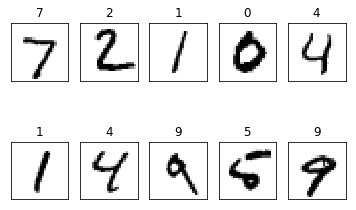

In [51]:
%matplotlib inline

fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1 번째에 숫자 이미지를 출력한다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않는다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력한다.
    # np.argmax는 tf.argmax와 같은 기능의 함수이다.
    # 결괏값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로, 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력한다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    # 1차원 배열로 되어 있는 i번째 이미지를 28 x 28 형식의 배열로 변형하여 이미지 형태로 출력한다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력한다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()

## 전체 코드

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 AVG. cost= 0.565
Epoch: 0002 AVG. cost= 0.319
Epoch: 0003 AVG. cost= 0.267
Epoch: 0004 AVG. cost= 0.242
Epoch: 0005 AVG. cost= 0.221
Epoch: 0006 AVG. cost= 0.208
Epoch: 0007 AVG. cost= 0.204
Epoch: 0008 AVG. cost= 0.194
Epoch: 0009 AVG. cost= 0.190
Epoch: 0010 AVG. cost= 0.184
Epoch: 0011 AVG. cost= 0.177
Epoch: 0012 AVG. cost= 0.177
Epoch: 0013 AVG. cost= 0.175
Epoch: 0014 AVG. cost= 0.169
Epoch: 0015 AVG. cost= 0.167
Epoch: 0016 AVG. cost= 0.165
Epoch: 0017 AVG. cost= 0.167
Epoch: 0018 AVG. cost= 0.161
Epoch: 0019 AVG. cost= 0.157
Epoch: 0020 AVG. cost= 0.157
Epoch: 0021 AVG. cost= 0.149
Epoch: 0022 AVG. cost= 0.147
Epoch: 0023 AVG. cost= 0.157
Epoch: 0024 AVG. cost= 0.137
Epoch: 0025 AVG. cost= 0.145
Epoch: 0026 AVG. cost= 0.141
Epoch: 0027 AVG. cost= 0.147
Epoch: 0028 AVG

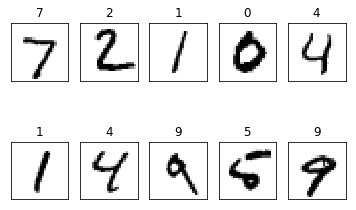

In [53]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

################
# 신경망 모델 구성 #
################

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L1, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10]))
B3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), B3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

################
# 신경망 모델 학습 #
################

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(30):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict = {X: batch_xs,
                                            Y: batch_ys,
                                            keep_prob: 0.8})
        total_cost += cost_val
        
    print ('Epoch:', '%04d' % (epoch + 1),
           'AVG. cost=', '{:.3f}'.format(total_cost / total_batch))
    
print ('최적화 완료!')

###########
# 결과 확인 #
########## 

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print ('정확도:', sess.run(accuracy,
                         feed_dict = {X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1}))

########################
# 결과 확인 (matplotlib) #
#######################

labels = sess.run(model, feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels,
                                    keep_prob: 1})

fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1 번째에 숫자 이미지를 출력한다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않는다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력한다.
    # np.argmax는 tf.argmax와 같은 기능의 함수이다.
    # 결괏값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로, 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력한다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    # 1차원 배열로 되어 있는 i번째 이미지를 28 x 28 형식의 배열로 변형하여 이미지 형태로 출력한다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력한다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()

# TODO

- 이미지와 레이블을 범위를 변경해가면서 출력해 보자

In [63]:
len(list(range(10)))

10

In [64]:
len(list(range(11, 21)))

10

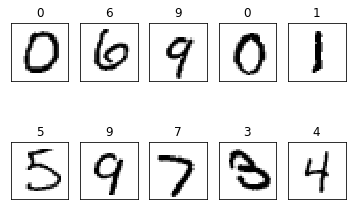

In [70]:
fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1 번째에 숫자 이미지를 출력한다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않는다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력한다.
    # np.argmax는 tf.argmax와 같은 기능의 함수이다.
    # 결괏값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로, 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력한다.
    subplot.set_title('%d' % np.argmax(labels[i+10]))
    # 1차원 배열로 되어 있는 i번째 이미지를 28 x 28 형식의 배열로 변형하여 이미지 형태로 출력한다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력한다.
    subplot.imshow(mnist.test.images[i+10].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()

- 학습시킨 모델을 저장하고 예측 결과만 빠르게 출력해보자

모델 저장

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

################
# 신경망 모델 구성 #
################

global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L1, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10]))
B3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), B3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

################
# 신경망 모델 학습 #
################

sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())

ckpt = tf.train.get_checkpoint_state('./model_ch6/')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    saver.restore(sess, ckpt.model_checkpoint_path)
else:
    sess.run(tf.global_variables_initializer())
    print ("it's new, not resotred")
    

batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(10):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict = {X: batch_xs,
                                            Y: batch_ys,
                                            keep_prob: 0.8})
        total_cost += cost_val
        
    print ('Epoch:', '%04d' % (epoch + 1),
           'AVG. cost=', '{:.3f}'.format(total_cost / total_batch))

saver.save(sess, './model_ch6/dnn_mnist.ckpt', global_step=global_step)    

print ('최적화 완료!')

###########
# 결과 확인 #
########## 

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print ('정확도:', sess.run(accuracy,
                         feed_dict = {X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1}))

########################
# 결과 확인 (matplotlib) #
#######################

labels = sess.run(model, feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels,
                                    keep_prob: 1})

fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1 번째에 숫자 이미지를 출력한다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않는다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력한다.
    # np.argmax는 tf.argmax와 같은 기능의 함수이다.
    # 결괏값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로, 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력한다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    # 1차원 배열로 되어 있는 i번째 이미지를 28 x 28 형식의 배열로 변형하여 이미지 형태로 출력한다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력한다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from ./model_ch6/dnn_mnist.ckpt-0
Epoch: 0001 AVG. cost= 0.184
Epoch: 0002 AVG. cost= 0.173
Epoch: 0003 AVG. cost= 0.170
Epoch: 0004 AVG. cost= 0.174
Epoch: 0005 AVG. cost= 0.169
Epoch: 0006 AVG. cost= 0.166
Epoch: 0007 AVG. cost= 0.165
Epoch: 0008 AVG. co

<Figure size 640x480 with 10 Axes>

결과 예측

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

################
# 신경망 모델 구성 #
################

global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
B1 = tf.Variable(tf.zeros([256]))
L1 = tf.add(tf.matmul(X, W1), B1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.dropout(L1, keep_prob)

W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
B2 = tf.Variable(tf.zeros([256]))
L2 = tf.add(tf.matmul(L1, W2), B2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.dropout(L1, keep_prob)

W3 = tf.Variable(tf.random_normal([256, 10]))
B3 = tf.Variable(tf.zeros([10]))
model = tf.add(tf.matmul(L2, W3), B3)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)

# 로딩 이전에 세션 열고
sess = tf.Session()

# tf.global_variables을 통해 앞서 정의한 변수들을 가져오는 함수이다. 이전에 학습한 결과를 불러와서 여기에 담는다.
saver = tf.train.Saver(tf.global_variables())

# 해당 체크포인트에서
ckpt = tf.train.get_checkpoint_state('./model_ch6/')
if ckpt and tf.train.checkpoint_exists(ckpt.model_checkpoint_path):
    # 불러와서 담는다
    saver.restore(sess, ckpt.model_checkpoint_path)
    
# 예측
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print ('정확도:', sess.run(accuracy, feed_dict={X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1}))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
INFO:tensorflow:Restoring parameters from ./model_ch6/dnn_mnist.ckpt-0
정확도: 0.9658


- 텐서플로로 손실값 그래프를 확인해보자

In [4]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data", one_hot=True)

################
# 신경망 모델 구성 #
################

global_step = tf.Variable(0, trainable=False, name='global_step')

X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

with tf.name_scope('layer1'):
    W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01))
    B1 = tf.Variable(tf.zeros([256]))
    L1 = tf.add(tf.matmul(X, W1), B1)
    L1 = tf.nn.relu(L1)
    L1 = tf.nn.dropout(L1, keep_prob)

with tf.name_scope('layer2'):
    W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01))
    B2 = tf.Variable(tf.zeros([256]))
    L2 = tf.add(tf.matmul(L1, W2), B2)
    L2 = tf.nn.relu(L2)
    L2 = tf.nn.dropout(L1, keep_prob)

with tf.name_scope('output'):
    W3 = tf.Variable(tf.random_normal([256, 10]))
    B3 = tf.Variable(tf.zeros([10]))
    model = tf.add(tf.matmul(L2, W3), B3)

with tf.name_scope('optimizer'):

    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
    optimizer = tf.train.AdamOptimizer(learning_rate=0.01).minimize(cost)
    
    tf.summary.scalar('cost', cost)

################
# 신경망 모델 학습 #
################

sess = tf.Session()
saver = tf.train.Saver(tf.global_variables())


sess.run(tf.global_variables_initializer())
print ("it's new, not resotred")

merged = tf.summary.merge_all()
writer = tf.summary.FileWriter('./logs2', sess.graph)


batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(10):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost],
                               feed_dict = {X: batch_xs,
                                            Y: batch_ys,
                                            keep_prob: 0.8})
        total_cost += cost_val
        
    summary = sess.run(merged, feed_dict={X: batch_xs, Y: batch_ys})
    writer.add_summary(summary, global_step=sess.run(global_step))
        
    print ('Epoch:', '%04d' % (epoch + 1),
           'AVG. cost=', '{:.3f}'.format(total_cost / total_batch))

saver.save(sess, './model_ch6/dnn_mnist.ckpt', global_step=global_step)    

print ('최적화 완료!')

###########
# 결과 확인 #
########## 

is_correct = tf.equal(tf.argmax(model, axis=1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print ('정확도:', sess.run(accuracy,
                         feed_dict = {X: mnist.test.images,
                                      Y: mnist.test.labels,
                                      keep_prob: 1}))

########################
# 결과 확인 (matplotlib) #
#######################

labels = sess.run(model, feed_dict={X: mnist.test.images,
                                    Y: mnist.test.labels,
                                    keep_prob: 1})

fig = plt.figure()

for i in range(10):
    # 2행 5열의 그래프를 만들고, i + 1 번째에 숫자 이미지를 출력한다.
    subplot = fig.add_subplot(2, 5, i + 1)
    # 이미지를 깨끗하게 출력하기 위해 x와 y의 눈금을 출력하지 않는다.
    subplot.set_xticks([])
    subplot.set_yticks([])
    # 출력한 이미지 위에 예측한 숫자를 출력한다.
    # np.argmax는 tf.argmax와 같은 기능의 함수이다.
    # 결괏값인 labels의 i번째 요소가 원-핫 인코딩 형식으로 되어 있으므로, 해당 배열에서 가장 높은 값을 가진 인덱스를 예측한 숫자로 출력한다.
    subplot.set_title('%d' % np.argmax(labels[i]))
    # 1차원 배열로 되어 있는 i번째 이미지를 28 x 28 형식의 배열로 변형하여 이미지 형태로 출력한다.
    # cmap 파라미터를 통해 이미지를 그레이스케일로 출력한다.
    subplot.imshow(mnist.test.images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
    
plt.show()

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
it's new, not resotred


InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,784]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'Placeholder', defined at:
  File "/Users/smfc/.pyenv/versions/3.6.4/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/smfc/.pyenv/versions/3.6.4/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/Users/smfc/.pyenv/versions/3.6.4/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/Users/smfc/.pyenv/versions/3.6.4/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/Users/smfc/.pyenv/versions/3.6.4/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2662, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2785, in _run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2903, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-4eb3ca6ff33c>", line 14, in <module>
    X = tf.placeholder(tf.float32, [None, 784])
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1808, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 4848, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3392, in create_op
    op_def=op_def)
  File "/Users/smfc/.pyenv/versions/3.6.4/envs/golbin-3min-tensor/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1718, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder' with dtype float and shape [?,784]
	 [[Node: Placeholder = Placeholder[dtype=DT_FLOAT, shape=[?,784], _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]
